In [1]:
import pandas as pd
import cnets
from netgross.network import dirNetwork

import intensity_fill

%load_ext wurlitzer
%matplotlib inline

ModuleNotFoundError: No module named 'cnets'

In [ ]:
df = pd.read_csv("ravdess_features.csv")

excluded = [
    "modality",
    "vocal_channel",
    "emotional_intensity",
    "statement",
    "repetition",
     "actor",
    "channels",
    "sample_width",
    "frame_rate",
    "frame_width",
    "sample_width",
    "stft_max",
    "frame_count",
    "length_ms",
    "mean",
    "max","min",
    # "kur","skew",
]
df.drop(columns=excluded, inplace=True)
df = intensity_fill.fill_intensity(df)
for field in ["sex", "emotion"]:
    df[field] = pd.Categorical(df[field]).codes

/home/djanloo/Desktop/dynamiting/intensity_fill.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.intensity[df.intensity.isna()] = I_from_std(df["std"][df.intensity.isna()])


normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = df.values

scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

Manifold knn representation

In [ ]:
sparse_matrix = cnets.stupid_knn(X_minmax.tolist(), # note: first argument must be a python list
                                4)
print() # somehow jupyter notebooks mess up outputs
net = dirNetwork.from_sparse(sparse_matrix)
net.initialize_embedding(dim=2)

cnets - INFO: requested knn with k = 4 of 2452 objects in R22
|▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒|98 %K
cnets - INFO: stupid_knn done.

Network has 2452 elements and 9773 links (density =  0.3 %)
cnets - INFO: Generating network...	Done.
cnets - INFO: Random initialization in R2...	Done.



cnets - WARNING: link(1012,1887) skipped - Distance must be a positive number (0.000000)

cnets - WARNING: link(1887,1012) skipped - Distance must be a positive number (0.000000)

cnets - WARNING: link(1887,1012) skipped - Distance must be a positive number (0.000000)

cnets - WARNING: link(1012,1887) skipped - Distance must be a positive number (0.000000)


In [ ]:
# note: first argument is a list of attractive factors, the second a list of repulsive ones and third a list of steps
net.cMDE([0.8, 0.5, 0.1], [0.05, 0.01, 0.0], [500, 100, 3000])

cnets - INFO: starting MDE with eps = 0.800, neg_eps = 0.050, Nsteps = 500
|▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒|99 % (D = 85.3344)K
cnets - INFO: MDE end
cnets - INFO: starting MDE with eps = 0.500, neg_eps = 0.010, Nsteps = 100
|▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ |98 % (D = 55.9521)0m
cnets - INFO: MDE end


KeyboardInterrupt: 

Plot started:
Getting graphics..	Done.
Updating scatter..	Done.


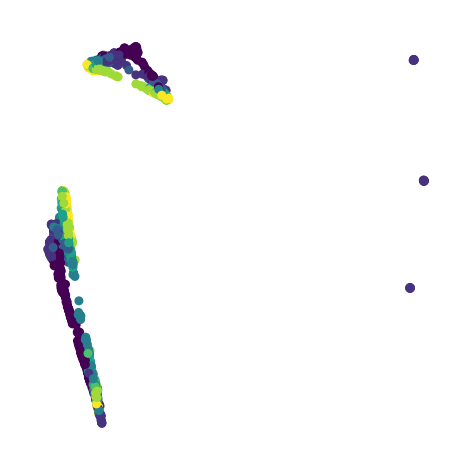

In [ ]:
from netgross import netplot
from matplotlib import pyplot as plt

net.values = df.emotion
netplot.plot_lines = False # the denser the network, the more time-expensive plotting lines is
netplot.line_kwargs['lw'] = 0.4
netplot.plot_net(net, plot_activation=False)
plt.show()